# Attempt to Learn NLF through the Kaggle Competition [Automated Essay Scoring](https://www.kaggle.com/competitions/learning-agency-lab-automated-essay-scoring-2/data?select=sample_submission.csv)

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('datasets/learning-agency-lab-automated-essay-scoring/train.csv')
test = pd.read_csv('datasets/learning-agency-lab-automated-essay-scoring/test.csv')

In [30]:

max_features = 10000
sequence_length = 250
embedding_dim = 16

# Model constants.
max_features = 20000
embedding_dim = 128
sequence_length = 500

import string
import re


# Having looked at our data above, we see that the raw text contains HTML break
# tags of the form '<br />'. These tags will not be removed by the default
# standardizer (which doesn't strip HTML). Because of this, we will need to
# create a custom standardization function.
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, "<br />", " ")
    return tf.strings.regex_replace(
        stripped_html, f"[{re.escape(string.punctuation)}]", ""
    )


# Now that we have our custom standardization, we can instantiate our text
# vectorization layer. We are using this layer to normalize, split, and map
# strings to integers, so we set our 'output_mode' to 'int'.
# Note that we're using the default split function,
# and the custom standardization defined above.
# We also set an explicit maximum sequence length, since the CNNs later in our
# model won't support ragged sequences.
vectorize_layer = keras.layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode="int",
    output_sequence_length=sequence_length,
)

vectorize_layer.adapt(train.full_text)


In [59]:


model = keras.Sequential([
    vectorize_layer,
    keras.layers.Embedding(max_features, embedding_dim),
    keras.layers.Dropout(0.2),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(300, activation='relu'),
        keras.layers.Dense(7, activation='softmax')
])

model.summary()



Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_4            │ (None, 500)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_11 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_11     │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [61]:
from sklearn.model_selection import train_test_split

Y = train.score
X = train.drop(["score", "essay_id"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)

model.fit(X, Y,validation_split=0.2, epochs=25)

Epoch 1/25
433/433 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5095 - loss: 1.1961 - val_accuracy: 0.5887 - val_loss: 0.9502
Epoch 2/25
433/433 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5916 - loss: 0.9243 - val_accuracy: 0.6127 - val_loss: 0.8807
Epoch 3/25
433/433 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6325 - loss: 0.8453 - val_accuracy: 0.6150 - val_loss: 0.9020
Epoch 4/25
433/433 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6585 - loss: 0.7891 - val_accuracy: 0.6129 - val_loss: 0.8873
Epoch 5/25
433/433 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6770 - loss: 0.7652 - val_accuracy: 0.5973 - val_loss: 0.9269
Epoch 6/25
433/433 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7176 - loss: 0.6896 - val_accuracy: 0.6118 - val_loss: 0.9181
Epoch 7/25
433/433 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7246 - loss: 0.6699 - val_accuracy: 0.6028 - val_loss: 0.9615
Epoch 8/25
433/433 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7424 - loss: 0.6182 - val_accu

In [50]:
predictions = np.argmax(model.predict(test.full_text), axis=1)

predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([3, 3, 4])

In [12]:
# from catboost import CatBoostClassifier

# clf = CatBoostClassifier(text_features=['full_text'])

# clf.fit(X_train, y_train)


Learning rate set to 0.089861
0:	learn: 1.7039607	total: 452ms	remaining: 7m 31s
1:	learn: 1.6339380	total: 788ms	remaining: 6m 33s
2:	learn: 1.5694968	total: 1.12s	remaining: 6m 12s
3:	learn: 1.5194922	total: 1.46s	remaining: 6m 2s
4:	learn: 1.4749786	total: 1.8s	remaining: 5m 58s
5:	learn: 1.4378306	total: 2.12s	remaining: 5m 51s
6:	learn: 1.3998048	total: 2.47s	remaining: 5m 49s
7:	learn: 1.3692783	total: 2.82s	remaining: 5m 50s
8:	learn: 1.3407795	total: 3.21s	remaining: 5m 53s
9:	learn: 1.3166286	total: 3.54s	remaining: 5m 50s
10:	learn: 1.2933561	total: 3.86s	remaining: 5m 47s
11:	learn: 1.2740169	total: 4.2s	remaining: 5m 45s
12:	learn: 1.2566582	total: 4.53s	remaining: 5m 43s
13:	learn: 1.2417815	total: 4.84s	remaining: 5m 41s
14:	learn: 1.2266412	total: 5.16s	remaining: 5m 38s
15:	learn: 1.2141333	total: 5.49s	remaining: 5m 37s
16:	learn: 1.2032929	total: 5.8s	remaining: 5m 35s
17:	learn: 1.1895527	total: 6.12s	remaining: 5m 34s
18:	learn: 1.1790452	total: 6.51s	remaining: 5m 

In [54]:


from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


# y_pred = clf.predict(X_test)
# confuse = confusion_matrix(y_test, y_pred=y_pred)


NameError: name 'clf' is not defined

array([[ 150,  195,   26,    3,    0,    0],
       [  95,  957,  337,   20,    0,    0],
       [  29,  400, 1192,  259,    9,    0],
       [   0,   18,  431,  676,   47,    0],
       [   0,    0,   10,  188,  102,    2],
       [   0,    0,    0,   14,   31,    2]])

The accuaracy is 0.59


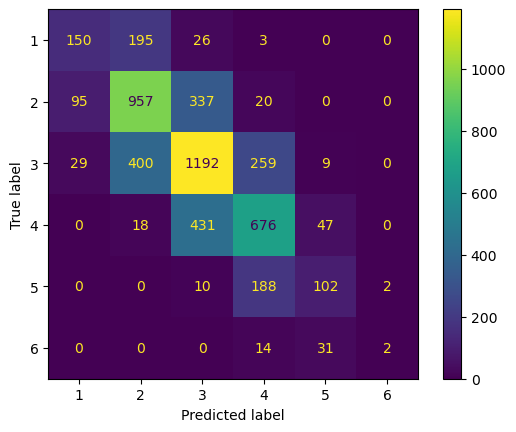

In [19]:
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# from sklearn.metrics import accuracy_score 

# print(f'The accuaracy is {accuracy_score(y_pred, y_test):.2f}')

541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


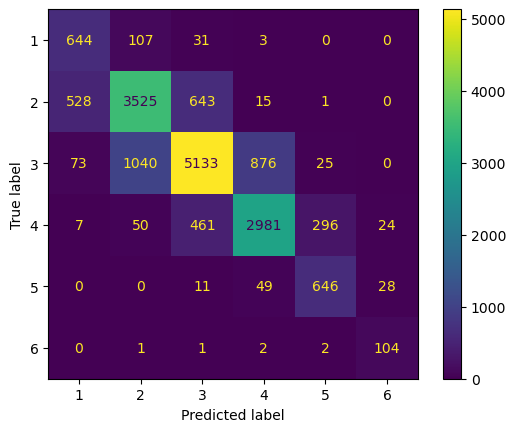

In [57]:
# ConfusionMatrixDisplay.from_predictions(np.argmax(model.predict(X.full_text), axis=1), Y)

In [23]:

test1 = test.drop('essay_id', axis=1)
scores = clf.predict(test1)

# Submission

In [58]:
def submit(y_pred):
    submission = pd.DataFrame()
    submission['essay_id'] = test.essay_id
    submission['score'] = y_pred
    submission.to_csv('submission.csv', header=True, index=False)


submit(predictions)